# Instruções de uso do JupyterLab
## Cursos de Verão IFMG-Arcos 2023
### Rotinas computacionais aplicadas às Ciências Térmicas - GESESC
#### Autor: *Reginaldo Gonçalves Leão Junior*

Esta célular e a anterior são unidades editáveis do tipo *Markdown*, conforme selecionado no 
*dropdown* na parte superior deste docuento. Dê dois clique rápidos em cada uma dessas células para ver seu código fonte. Para aprender mais sobre a linguagem de marcação *Markdown* siga esse [LINK](https://docs.pipz.com/central-de-ajuda/learning-center/guia-basico-de-markdown#open).

Após inpecionar o código fonte, você pode executar a célula de três formas distintas.

1. Usando o botão ▶ na parte superior deste documento;
2. Com o atalho de teclado Ctrl+Enter;
3. Ou para executar e criar uma nova célula logo abaixo com o atalho de teclado Shift+Enter. 

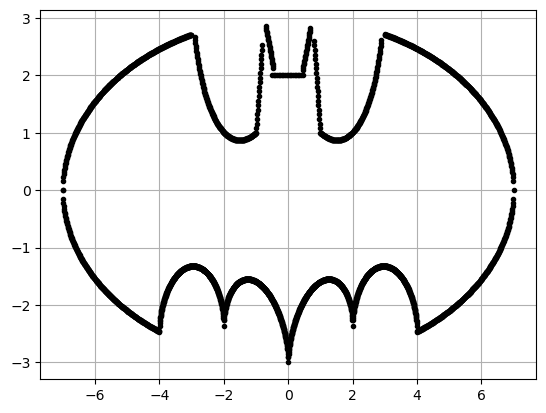

In [1]:
# Já esta célular é do tipo Code,
# nela são inseridos os códigos que desejamos executar.
# Em nosso curso utilizaremos a linquagem Python, por isso
# este texto é inserido no formato de comentário.

import numpy as np
import matplotlib.pyplot as plt
Y = np.arange(-4,4,.005)
X = np.zeros((0))
for y in Y:
    X = np.append(
        X,abs(y/2)- 0.09137*y**2 + np.sqrt(1-(abs(abs(y)-2)-1)**2) -3
    )
  
Y1 = np.append(np.arange(-7,-3,.01), np.arange(3,7,.01))
X1 = np.zeros((0))

for y in Y1:
    X1 = np.append(X1, 3*np.sqrt(-(y/7)**2+1))

X = np.append(X,X1)
Y = np.append(Y, Y1)
Y1 = np.append(np.arange(-7.,-4,.01), np.arange(4,7.01,.01))
X1 = np.zeros((0))

for y in Y1:
    X1 = np.append(X1, -3*np.sqrt(-(y/7)**2+1))

X = np.append(X,X1)
Y = np.append(Y, Y1)
Y1 = np.append(np.arange(-1,-.8,.01), np.arange(.8, 1,.01))
X1 = np.zeros((0))

for y in Y1:
    X1 = np.append(X1, 9-8*abs(y))

X = np.append(X,X1)
Y = np.append(Y, Y1)
Y1 = np.arange(-.5,.5,.05)
X1 = np.zeros((0))

for y in Y1:
    X1 = np.append(X1,2)

X = np.append(X,X1)
Y = np.append(Y, Y1)
Y1 = np.append(np.arange(-2.9,-1,.01), np.arange(1, 2.9,.01))
X1 = np.zeros((0))

for y in Y1:
    X1 = np.append(
        X1, 1.5 - .5*abs(y) - 1.89736*(np.sqrt(3-y**2+2*abs(y))-2)
    )

X = np.append(X,X1)
Y = np.append(Y, Y1)
Y1 = np.append(np.arange(-.7,-.45,.01), np.arange(.45, .7,.01))
X1 = np.zeros((0))

for y in Y1:
    X1 = np.append(X1, 3*abs(y)+.75)

X = np.append(X,X1)
Y = np.append(Y, Y1)

plt.plot(Y,X, 'k.')
plt.grid()
plt.show()

As células do tipo *MarkDown* também suportam a formatação matemática LaTeX.

$$
\begin{cases}
\nu = {V}\div{m} \\
n = {m}\div{M} \\
R = {R_u}\div{M} \\
PV = n R_u T \\
P \nu = R T
\end{cases}
$$

### Atividade 1
Na célula abaixo, represente graficamente as propriedades de um gás ideal (TV) de massa molar igual ao do CO (28,01 g/mol), 
cujo volume específico varie entre $10^{-3}$ e $10^2$ m³/kg. Use isobáricas de 10kPa, 100kPa, 1MPa e 10 MPa.

In [3]:
# Importação de livrarias
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def gas_ideal(
    mmolar, 
    interv_volesp,
    lst_isbr,
    delta = 0.001
):

    CONST_R = 8.31/mmolar
    vols = np.arange(interv_volesp[0], interv_volesp[-1]+delta, delta)
    mat_tv = np.array(
        [
           p * vols / CONST_R for p in lst_isbr
        ]
    )
    mat_tv = np.append(mat_tv, [vols], axis=0)
    return mat_tv

In [8]:
sol = gas_ideal(18.01/1000, [10e-3, 10e2], [1e4, 1e5, 1e6, 1e7])
sol

array([[2.16726835e-01, 2.38399519e-01, 2.60072202e-01, ...,
        2.16726402e+04, 2.16726618e+04, 2.16726835e+04],
       [2.16726835e+00, 2.38399519e+00, 2.60072202e+00, ...,
        2.16726402e+05, 2.16726618e+05, 2.16726835e+05],
       [2.16726835e+01, 2.38399519e+01, 2.60072202e+01, ...,
        2.16726402e+06, 2.16726618e+06, 2.16726835e+06],
       [2.16726835e+02, 2.38399519e+02, 2.60072202e+02, ...,
        2.16726402e+07, 2.16726618e+07, 2.16726835e+07],
       [1.00000000e-02, 1.10000000e-02, 1.20000000e-02, ...,
        9.99998000e+02, 9.99999000e+02, 1.00000000e+03]])

[]

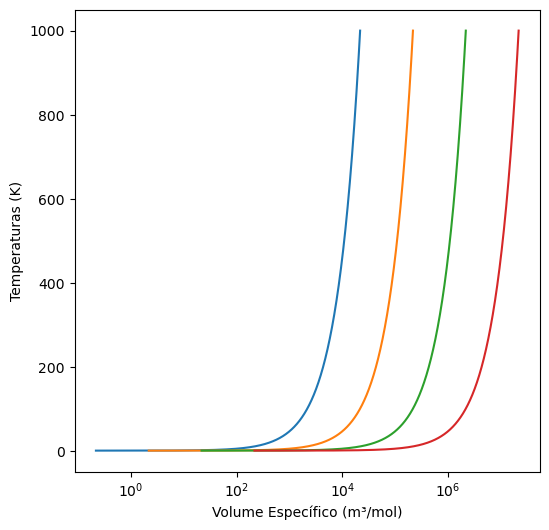

In [11]:
isob = [1e4, 1e5, 1e6, 1e7]
fig, ax = plt.subplots(figsize = (6,6))
for ib, v in zip(isob, sol[:-1]):
    ax.plot(v, sol[-1], label = f"{ib} Pa" )
ax.set_xlabel("Volume Específico (m³/mol)")
ax.set_xscale('log')
ax.set_ylabel("Temperaturas (K)")
plt.plot()

### Vetorização

Na solução anterior, foi usado o conceito de vetorização do problema. 
Neste tipo de abordagem, o método deve ser desenvolvido de forma que as grandezas não sejam pensadas como escalares, mas vetores de escalares. 
Dessa forma as funções de álgebra linear do NumPy podem ser usadas no lugar de *loops* nativos do Python, o que confere desepenho computacional imensamente superior.